<p align="center">
  <br/>
    <img alt="ScaleDP" src="https://raw.githubusercontent.com/StabRise/ScaleDP/refs/heads/master/images/scaledp.webp" width="376" style="max-width: 100%;">
  <br/>
</p>

<p align="center">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/scaledp-tutorials/blob/master/1.QuickStart.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://pypi.org/project/scaledp/" alt="Package on PyPI"><img src="https://img.shields.io/pypi/v/scaledp.svg" /></a>    
    <a href="https://github.com/stabrise/scaledp/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/scaledp.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</p>

In [1]:
from scaledp import *

spark = ScaleDPSession()
spark

/Users/olchikd/Library/Caches/pypoetry/virtualenvs/scaledp-CKmo68Wf-py3.11/lib/python3.11/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/17 21:30:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/03/17 21:30:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/03/17 21:30:31 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.



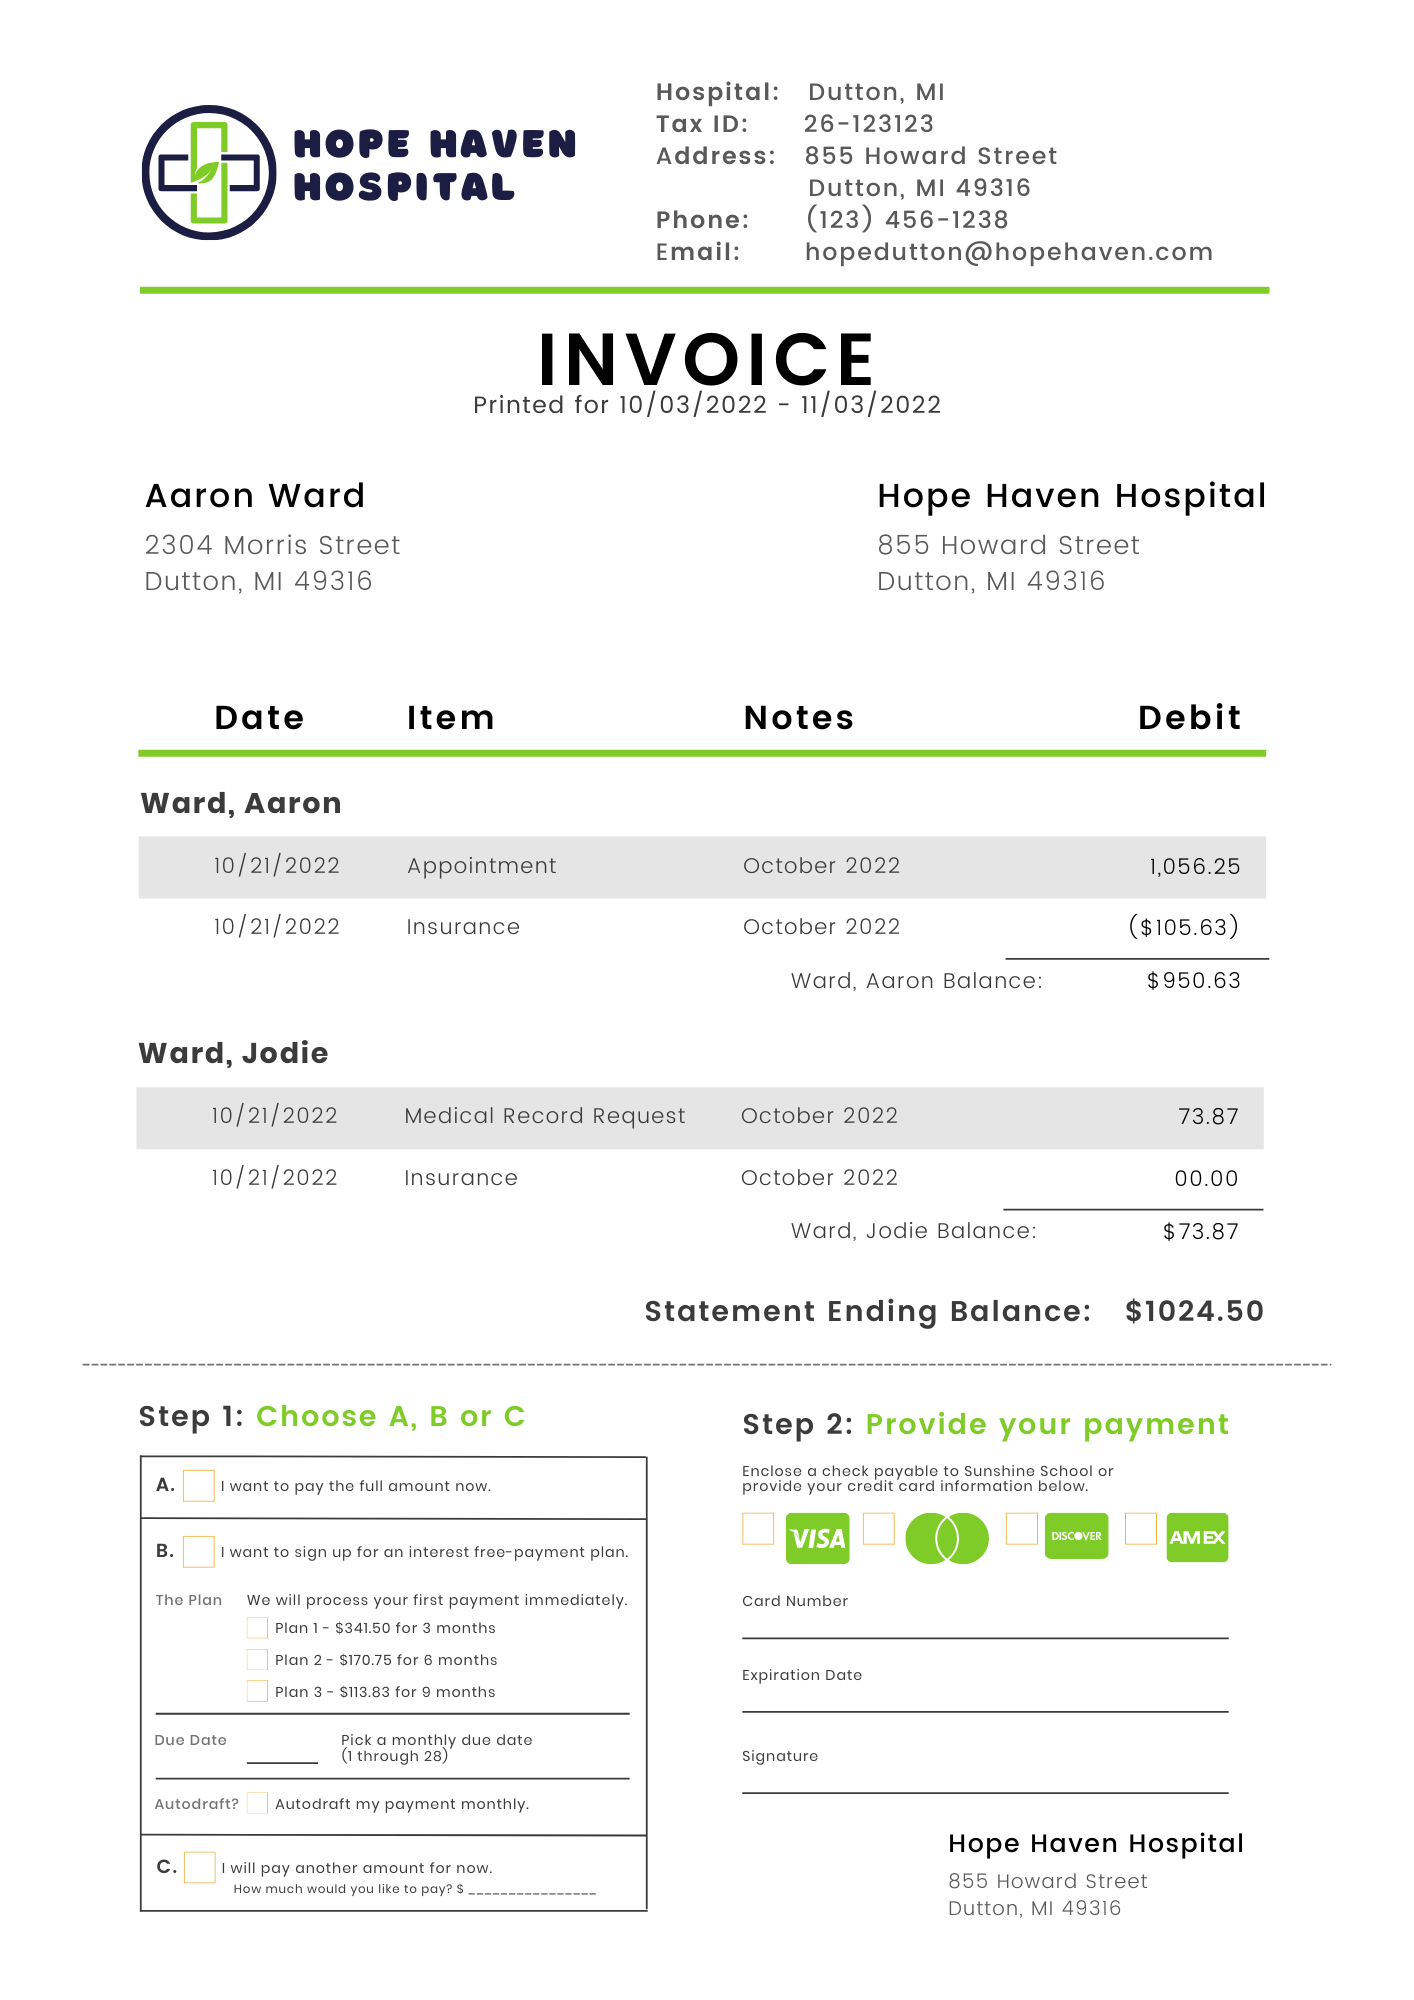

In [2]:
image_example = files('resources/images/Invoice.png')
df = spark.read.format("binaryFile") \
    .load(image_example)

df.show_image("content")

In [3]:
pipeline = PipelineModel(stages=[
    DataToImage(inputCol="content", outputCol="image"),
    TesseractOcr(inputCol="image", outputCol="text", psm=PSM.AUTO, keepInputData=True),
    Ner(model="obi/deid_bert_i2b2", inputCol="text", outputCol="ner", keepInputData=True),
    ImageDrawBoxes(inputCols=["image", "ner"], outputCol="image_with_boxes", lineWidth=3, 
                   padding=5, displayDataList=['entity_group'])
])

result = pipeline.transform(df).cache()

result.show()

+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|                path|    modificationTime|length|                text|                 ner|    image_with_boxes|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|file:/home/nmelni...|2024-11-18 19:06:...|289502|{file:/home/nmeln...|{file:/home/nmeln...|{file:/home/nmeln...|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+



In [4]:
result.show_text("text")

In [5]:
result.show_ner(limit=20)

+------------+-------------------+----------+-----+---+--------------------+
|entity_group|              score|      word|start|end|               boxes|
+------------+-------------------+----------+-----+---+--------------------+
|        HOSP|  0.991257905960083|  Hospital|    0|  8|[{Hospital:, 0.94...|
|         LOC|  0.999171257019043|    Dutton|   10| 16|[{Dutton,, 0.9609...|
|         LOC| 0.9992585778236389|        MI|   18| 20|[{MI, 0.93335297,...|
|          ID| 0.6838774085044861|        26|   29| 31|[{26-123123, 0.90...|
|       PHONE| 0.4669836759567261|         -|   31| 32|[{26-123123, 0.90...|
|       PHONE| 0.7790696024894714|    123123|   32| 38|[{26-123123, 0.90...|
|        HOSP|0.37445762753486633|      HOPE|   39| 43|[{HOPE, 0.9525460...|
|        HOSP| 0.9503226280212402|     HAVEN|   44| 49|[{HAVEN, 0.952546...|
|         LOC| 0.9975488185882568|855 Howard|   59| 69|[{855, 0.94682700...|
|         LOC| 0.9984399676322937|    Street|   70| 76|[{Street, 0.95823...|

In [6]:
result.visualize_ner(labels_list=["DATE", "LOC"])


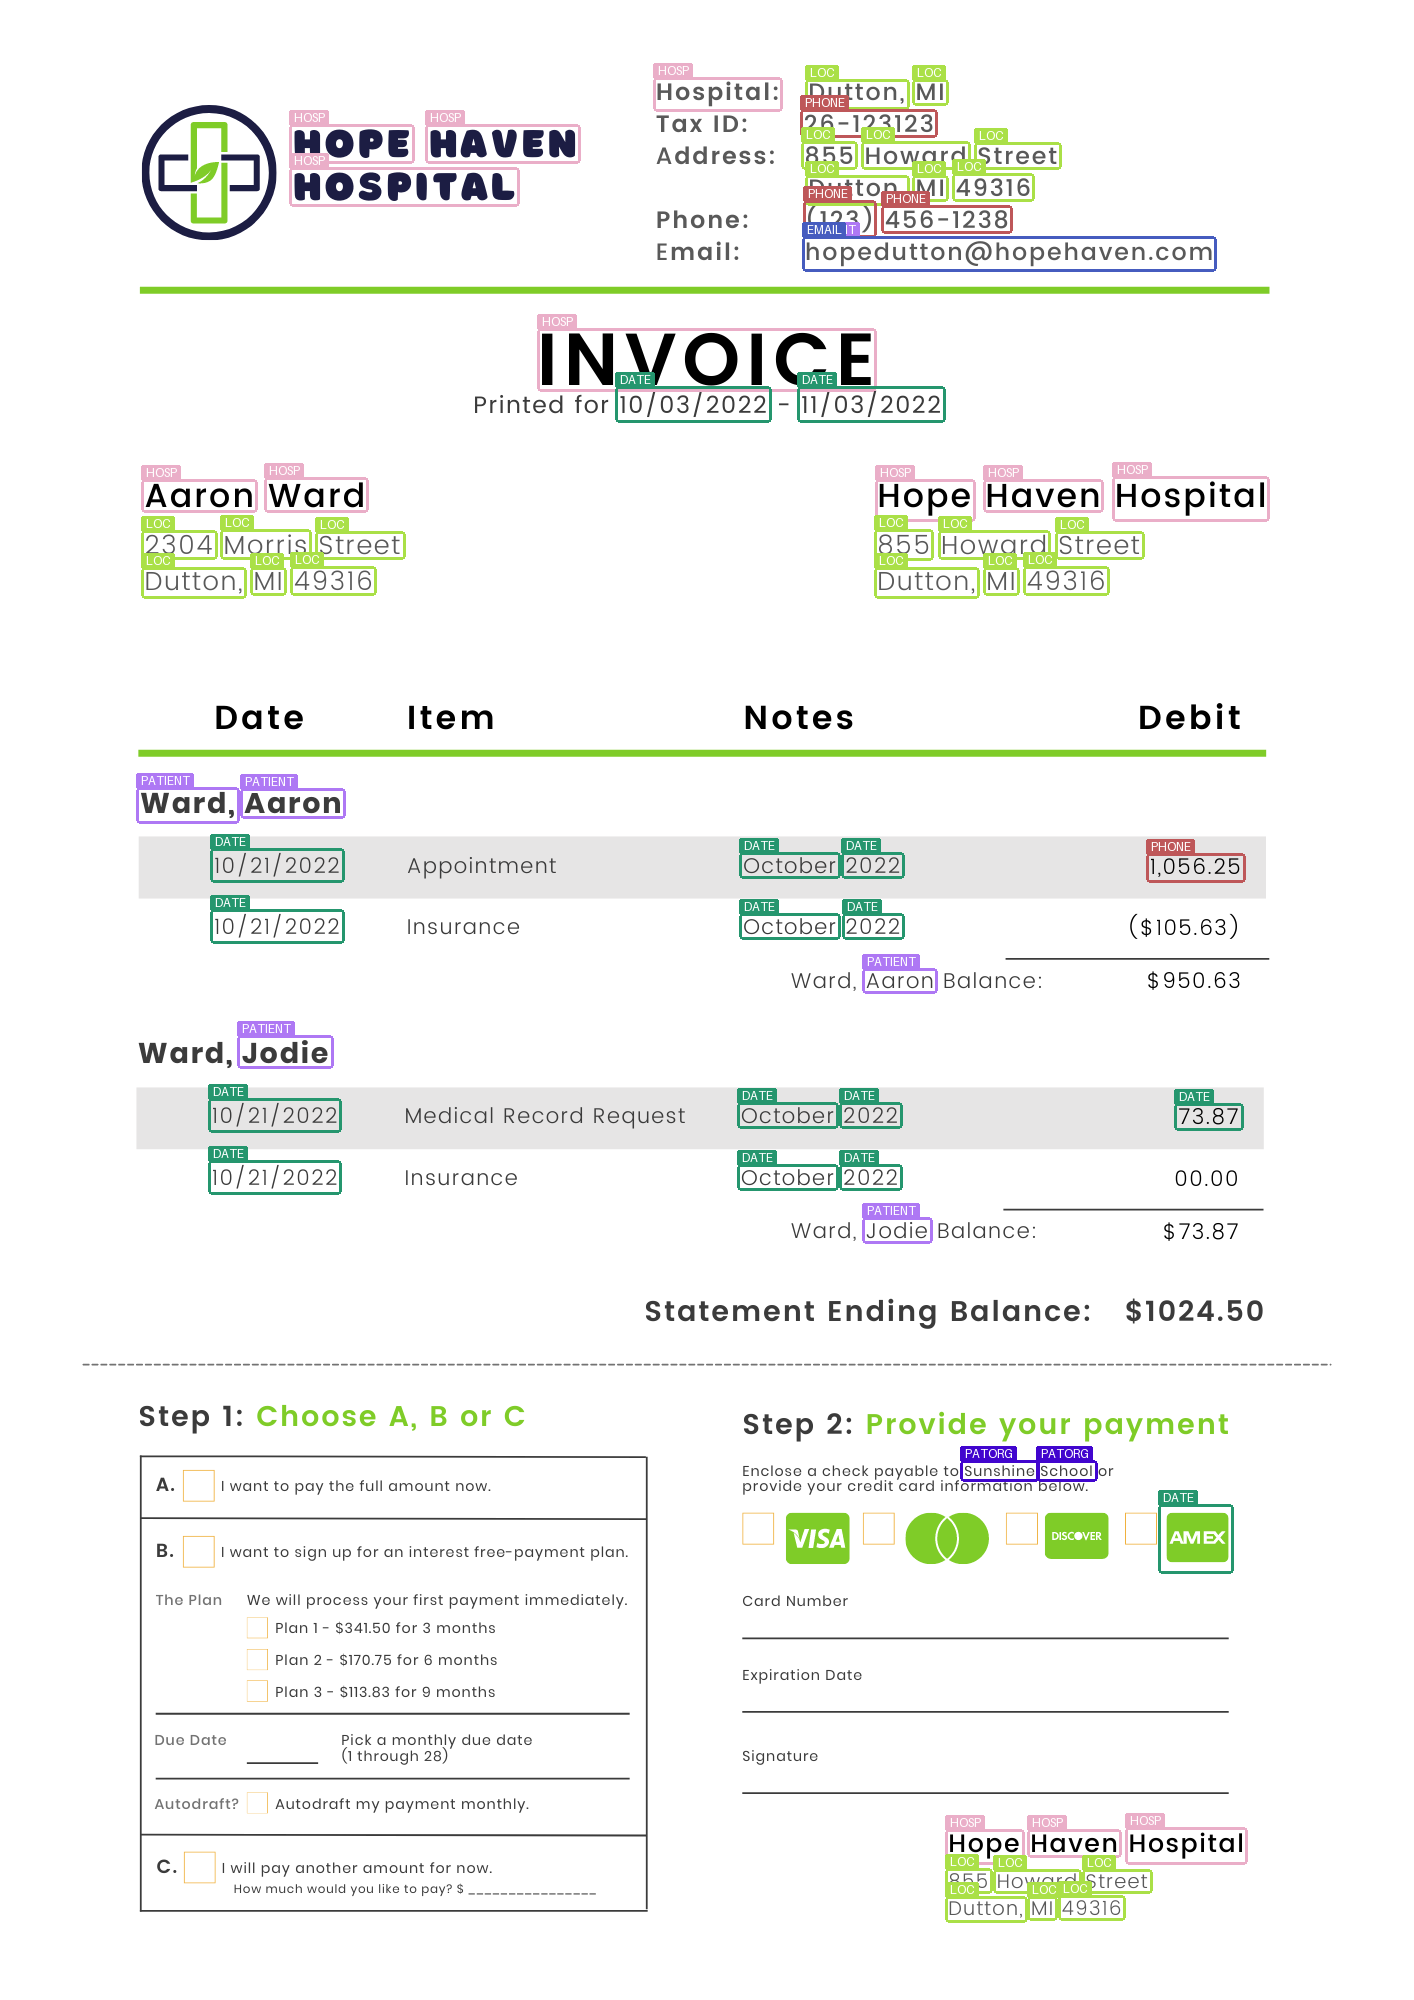

In [7]:
result.show_image("image_with_boxes")